# Plot difference

In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import glob
from scipy.interpolate import griddata
import os
from shutil import copyfile
import re

# Working with directores and files
## Inside the directore must have the invdir, and data folders. If there is no a pngs folder, the code create it for you.

In [2]:

path_d = "../Example_files/"
#path_d = "/home/felipe/tmp/AZ/FEB_MAR_2020/data/Sg/test/"
if os.path.exists(path_d + "invdir/ref"):
    ref = path_d + "invdir/ref/f001_res.vtk" 
    copyfile(ref,path_d + "invdir/" + "f000_res.vtk") 
files = [f for f in glob.glob(path_d + "invdir/f???_res.vtk")]
files.sort()
#data = [d for d in glob.glob(path_d + "data/*.stg")]
data = [d for d in glob.glob(path_d + "data/*.tx0")]

data.sort()

if not os.path.exists(path_d + "pngs/rho"):
        os.makedirs(path_d + "pngs/rho")
#os.mkdir(path_+"pngs")

pngs = [p for p in glob.glob(path_d + "pngs/*.png")]

In [3]:
# Define the colormap
number_of_color = 2**3 ## not being used. I need to understand better how control the number of colors in cmap & palete
cmap = plt.cm.gist_earth  # define the colormap
#cmap = plt.cm.seismic
#cmaplist = [cmap(i) for i in np.linspace(0,cmap.N+1,number_of_color)]
cmaplist = [cmap(i) for i in range(cmap.N)]
#cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

In [4]:
# Define the axes
fig_size = (14, 6)
axes2 = [0.93, 0.1, 0.02, 0.8] # palete

text_size = 12
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

mm = np.zeros(2)
mm[0] = 10000
ref={}
diff=[]
for w,f in enumerate(files):
    if(str(f) not in str(pngs)):
        with open(f,'r') as fh:
            a = ' '
            while 'POINTS' not in a:
                a = (fh.readline().strip())
            string = re.sub('double',' ',re.sub('POINTS',' ', a))
            nnodal = int(string)
            Nodal = []
            Elem = []
            rho_truelog = []
            rho = []
            S = []
            dump = fh.readlines()
            for i, line in enumerate(dump):
                if(i < nnodal):
                    Nodal.append(line.split())
                elif (i == nnodal):
                    n = line.split()
                elif (i < int(n[1])+nnodal+1):
                    Elem.append(line.split())
                elif(i < int(n[1])+nnodal+7):
                    f = line.split()
                elif(i < int(n[1])+nnodal+8):
                    rho = line.split()
                elif(i < int(n[1])+nnodal+10):
                    f = line.split()
                elif(i < int(n[1])+nnodal+11):
                    rho_truelog = line.split()
                #elif(i < int(n[1])+nnodal+13):
                #    f = line.split()
                #elif(i < int(n[1])+nnodal+14):
                #    dif = line.split()
                #elif(i < int(n[1])+nnodal+16):
                #    f = line.split()
                #elif(i < int(n[1])+nnodal+17):
                #    S = line.split()
        Elem = np.asarray(Elem).astype(int)
        Nodal = np.asarray(Nodal).astype(float)
        #S = np.asarray(S).astype(float)
        rho_truelog = np.asarray(rho_truelog).astype(float)
        rho = np.asarray(rho).astype(float)
        
        if(mm[0] > min(rho_truelog)):
            mm[0] = min(rho_truelog)
        if(mm[1] < max(rho_truelog)):
            mm[1] = max(rho_truelog)   
        
        
        if (w == 1):
            xmin = min(Nodal[:,0])
            xmax = max(Nodal[:,0]) 
            ymin = min(Nodal[:,1]) # + ? 
            ymax = max(Nodal[:,1]) + 0.5 
            
        #if(plot == 'rho'):
        #    vmin = min(rho)
        #    vmax = max(rho)
            
        #elif(plot == 'rho_log'):
        #    vmin = min(rho_truelog)
        #    vmax = max(rho_truelog)
            
        #else:
        #    for i,e in enumerate(Elem):
            
        #        index1 = int(e[1]) 
        #        index2 = int(e[2])
        #        index3 = int(e[3])
            
        #        polygon = ((Nodal[index1,0], Nodal[index1,1]), \
        #               (Nodal[index2,0],Nodal[index2,1]), \
        #               (Nodal[index3,0], Nodal[index3,1]), \
        #               (Nodal[index1,0], Nodal[index1,1]))
            
        #        if(w == 0):
        #            ref.update({polygon:rho[i]})
            
        #        diff.append(float(rho[i]) - float(ref[polygon]))        

# Choose mm (values min and max) based on your data

Mean:  -0.04897017543859649 1.1796636449760767
Std:  0.030546897306550476 0.6620793565800847


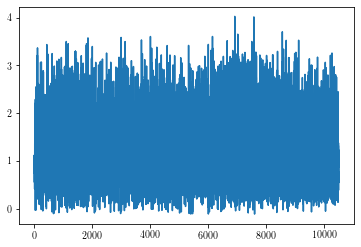

In [5]:
plt.plot(rho_truelog)
a=np.asarray(rho_truelog)
print("Mean: ",a[a<0].mean(), a[a>0].mean())
print("Std: ",a[a<0].std(), a[a>0].std())

In [ ]:
mm

Working on ../Example_files/invdir/f000_res.vtk
0 23497
../Example_files/data/2018-11-10_16-28-41.tx0
../Example_files/pngs/rho/2018-11-10_16-28-41.png
rho/2018-11-10_16-28-41


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


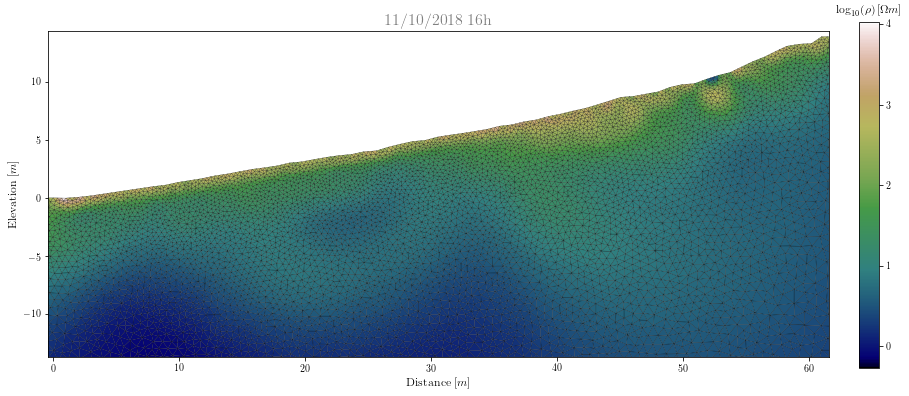

Working on ../Example_files/invdir/f001_res.vtk
1 15961
../Example_files/data/2018-12-10_16-29-24.tx0
../Example_files/pngs/rho/2018-12-10_16-29-24.png
rho/2018-12-10_16-29-24


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


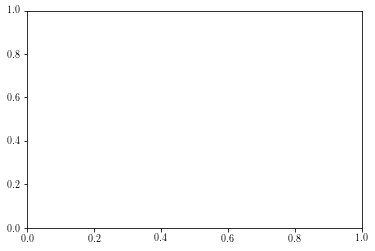

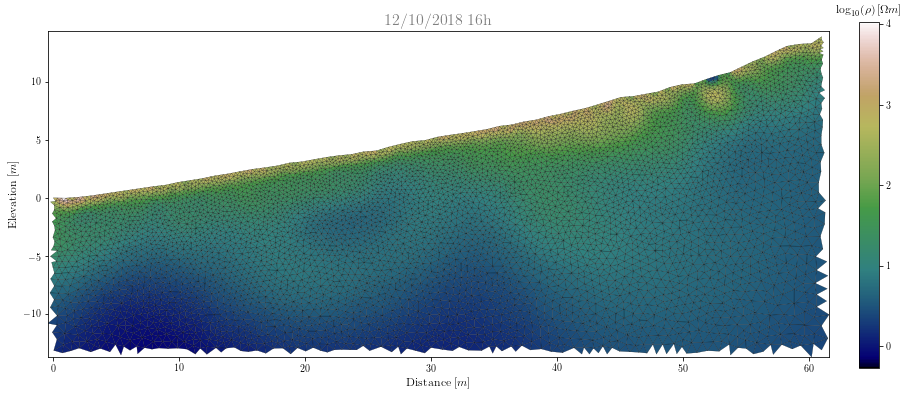

Working on ../Example_files/invdir/f002_res.vtk
2 15961
../Example_files/data/2019-01-10_02-26-25.tx0
../Example_files/pngs/rho/2019-01-10_02-26-25.png
rho/2019-01-10_02-26-25


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


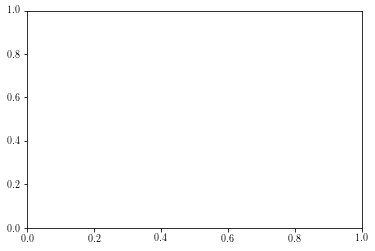

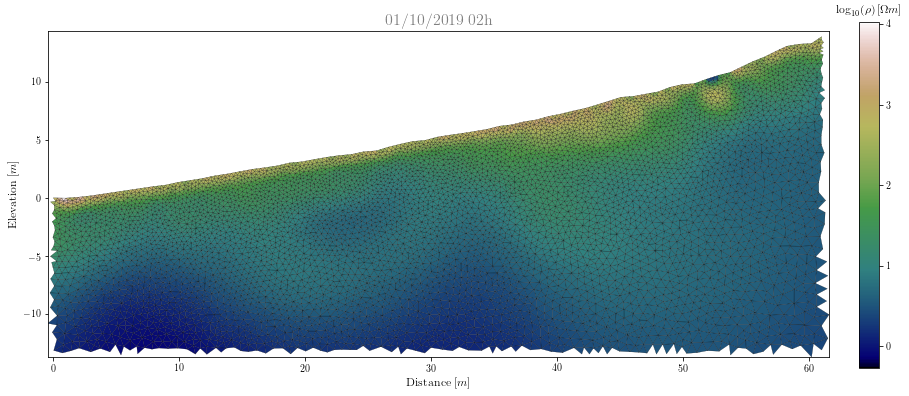

Working on ../Example_files/invdir/f003_res.vtk
3 15961
../Example_files/data/2019-02-10_02-27-10.tx0
../Example_files/pngs/rho/2019-02-10_02-27-10.png
rho/2019-02-10_02-27-10


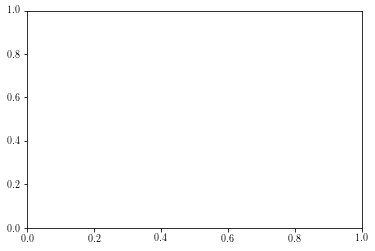

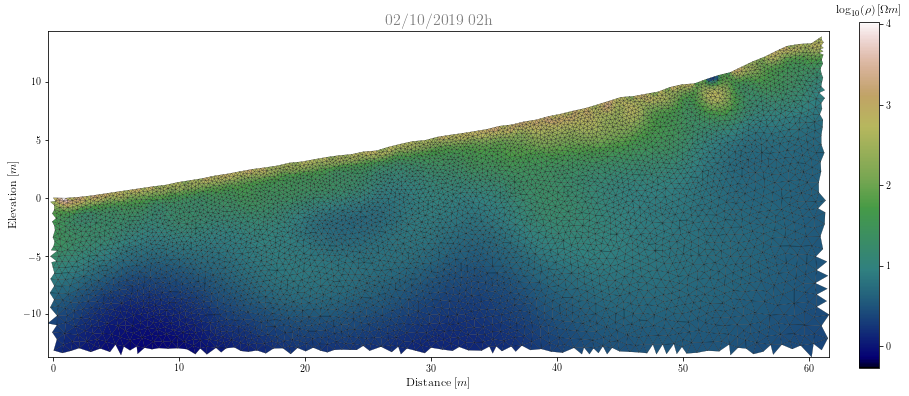

Working on ../Example_files/invdir/f004_res.vtk
4 15961
../Example_files/data/2019-03-10_11-29-01.tx0
../Example_files/pngs/rho/2019-03-10_11-29-01.png
rho/2019-03-10_11-29-01


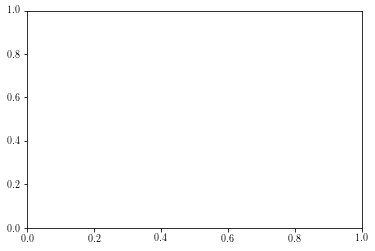

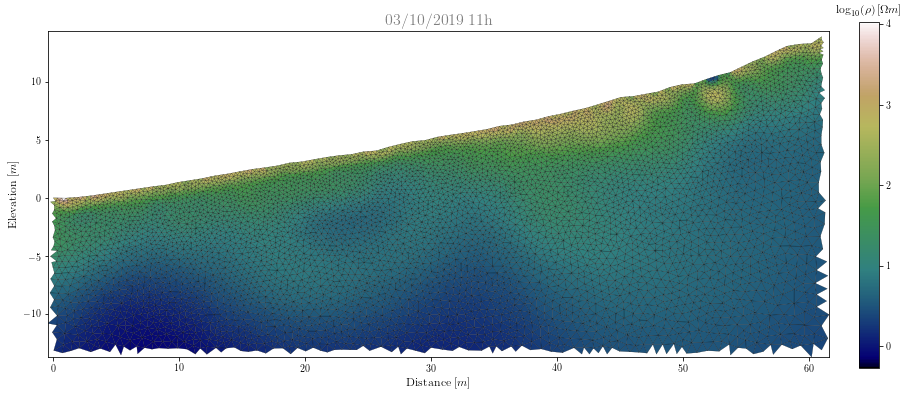

Working on ../Example_files/invdir/f005_res.vtk
../Example_files/data/2019-04-10_00-01-01.tx0
../Example_files/pngs/rho/2019-04-10_00-01-01.png
rho/2019-04-10_00-01-01


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


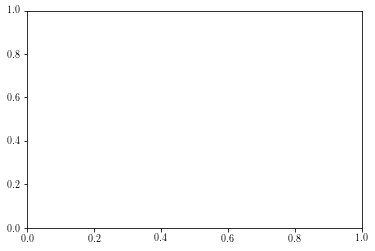

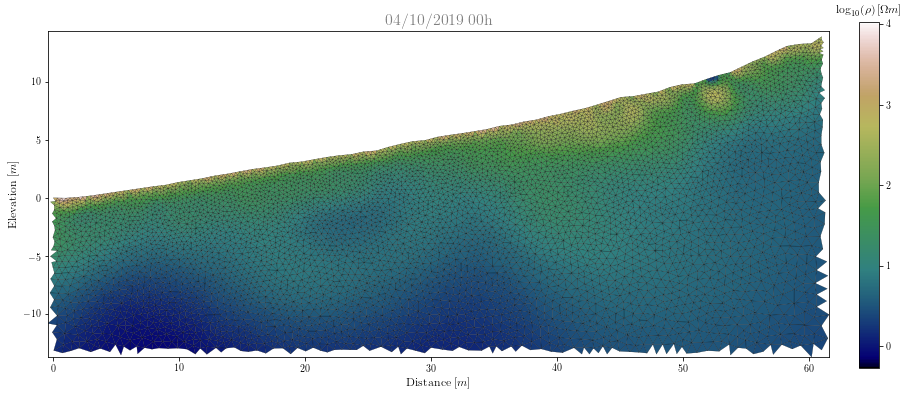

Working on ../Example_files/invdir/f006_res.vtk
../Example_files/data/2019-05-10_00-01-45.tx0
../Example_files/pngs/rho/2019-05-10_00-01-45.png
rho/2019-05-10_00-01-45


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


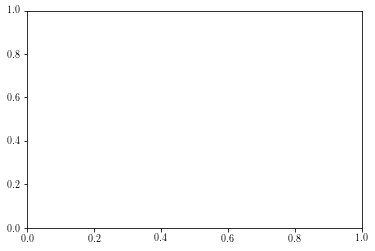

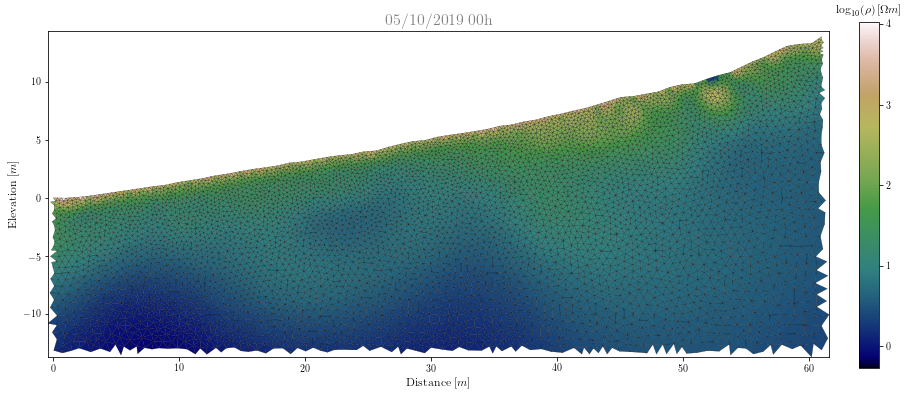

Working on ../Example_files/invdir/f007_res.vtk
../Example_files/data/2019-06-10_00-02-30.tx0
../Example_files/pngs/rho/2019-06-10_00-02-30.png
rho/2019-06-10_00-02-30


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


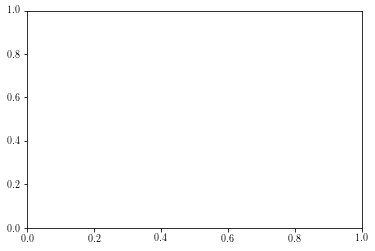

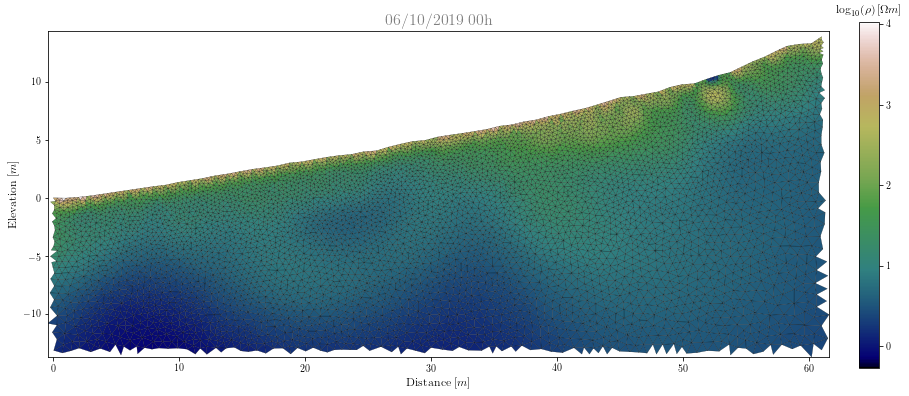

Working on ../Example_files/invdir/f008_res.vtk
../Example_files/data/2019-07-10_12-03-14.tx0
../Example_files/pngs/rho/2019-07-10_12-03-14.png
rho/2019-07-10_12-03-14


/home/felipe/.conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


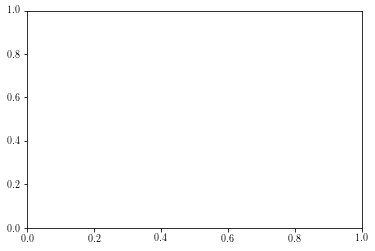

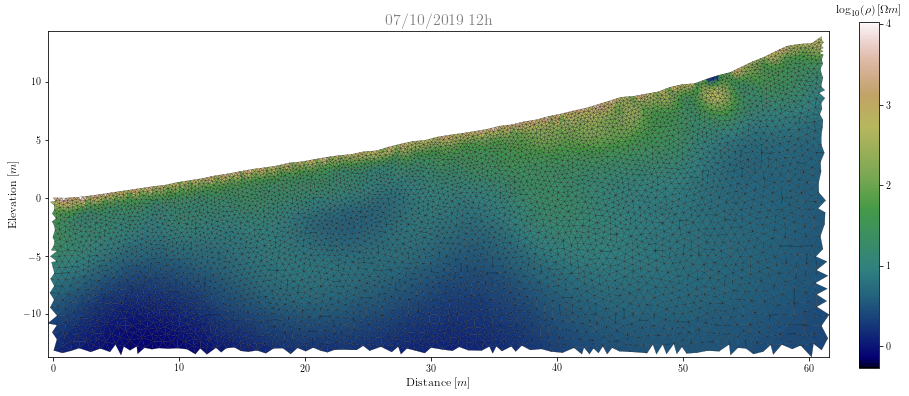



Images saved in ../Example_files/pngs/rho/


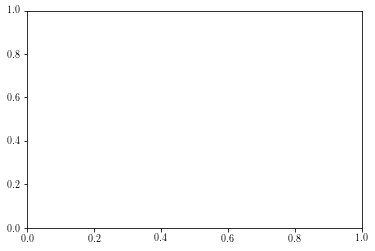

In [6]:
ref = {}
#mm = [0, 400]
bounds = np.linspace(mm[0], mm[1], cmap.N)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for w,f in enumerate(files):
    if(str(f) not in str(pngs)):
        print("Working on " + f)
                
        fig, ax = plt.subplots(1, 1, figsize = fig_size)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        ax.set_xlabel("Distance [$m$]",size=text_size)
        ax.set_ylabel("Elevation [$m$]",size=text_size)
       
        with open(f,'r') as fh:
            a = ' '
            while 'POINTS' not in a:
                a = (fh.readline().strip())
            string = re.sub('double',' ',re.sub('POINTS',' ', a))
            nnodal = int(string)
            Nodal = []
            Elem = []
            rho_truelog = []
            rho = []
            S = []
            dump = fh.readlines()
            for i, line in enumerate(dump):
                if(i < nnodal):
                    Nodal.append(line.split())
                elif (i == nnodal):
                    n = line.split()
                elif (i < int(n[1])+nnodal+1):
                    Elem.append(line.split())
                elif(i < int(n[1])+nnodal+7):
                    f = line.split()
                elif(i < int(n[1])+nnodal+8):
                    rho = line.split()
                elif(i < int(n[1])+nnodal+10):
                    f = line.split()
                elif(i < int(n[1])+nnodal+11):
                    rho_truelog = line.split()
                elif(i < int(n[1])+nnodal+13):
                    f = line.split()
                elif(i < int(n[1])+nnodal+14):
                    dif = line.split()
                    print(w,i)
                elif(i < int(n[1])+nnodal+16):
                    f = line.split()
                elif(i < int(n[1])+nnodal+17):
                    S = line.split()
        Elem = np.asarray(Elem).astype(int)
        Nodal = np.asarray(Nodal).astype(float)
        S = np.asarray(S).astype(float)
        rho_truelog = np.asarray(rho_truelog).astype(float)
        rho = np.asarray(rho).astype(float)
       
        for i,e in enumerate(Elem):
            
            index1 = int(e[1]) 
            index2 = int(e[2])
            index3 = int(e[3])
            
            polygon = ((Nodal[index1,0], Nodal[index1,1]), \
                       (Nodal[index2,0],Nodal[index2,1]), \
                       (Nodal[index3,0], Nodal[index3,1]), \
                       (Nodal[index1,0], Nodal[index1,1]))
            
            if(w == 0):
                ref.update({polygon:rho[i]})
            
            indexC = float(rho_truelog[i]) # - float(ref[polygon])   
            indice = int( (indexC - mm[0])*len(cmaplist) / (mm[1] - mm[0])) - 1
            
            if (indice >= 256):
                indice = 255;
            elif(indice < 0):
                indice = 0
            else:
                plotC = cmaplist[ int( (indexC - mm[0])*len(cmaplist) \
                                      / (mm[1] - mm[0])) - 1]  
                        
            codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]#patches.append(polygon)
            path = Path(polygon,codes)
       
            patch = patches.PathPatch(path, facecolor=plotC, edgecolor=None, lw=0.2)
            ax.add_patch(patch)

        ax2 = fig.add_axes(axes2)
        #ax2.set_ylabel('Resistivity [$\Omega m$]',size=text_size)
        ax2.set_title('$ \log_{10}(\\rho) \, [\Omega m]$',size=text_size)
        cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=[np.linspace(np.around(mm[0]),np.around(mm[1]),5)], boundaries=bounds)
         
        print(data[w])    
        fname = path_d + 'pngs/rho/' + re.sub(path_d,' ',data[w])[6:-3] + 'png'
        print(fname)
        title = re.sub(path_d,' ',fname)[6:-4]
        print(title)
        ax.set_title(title[9:11] + '/' + title[12:14] + '/' + title[4:8] + ' ' + title[15:17] + 'h',fontsize=16, color='gray')
        plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
        plt.show()
        plt.close(fig)
        plt.clf()
        plt.cla()
print("\n\nImages saved in " + path_d + 'pngs/rho/')